In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [3]:
bike_rentals=pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


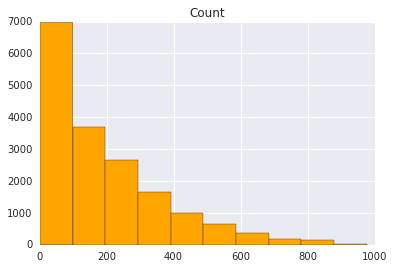

In [14]:
plt.hist(bike_rentals["cnt"], color="orange")
plt.title("Count")
plt.show()


In [15]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [16]:
def assign_label(hour):
    if hour >=6 and hour < 12:
        return 1
    elif hour >=12 and hour < 18:
        return 2
    elif hour >=18 and hour <= 24:
        return 3
    elif hour >=0 and hour < 6:
        return 4
    
bike_rentals["time_label"]=bike_rentals["hr"].apply(assign_label)

## Error metric : MSE
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [19]:
train=bike_rentals.sample(frac=0.8)
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [33]:
columns=list(train.columns)
columns.remove("cnt")
columns.remove("casual")
columns.remove("dteday")
columns.remove("registered")

In [39]:
lr=LinearRegression()
lr.fit(train[columns],train["cnt"])
labels=lr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error


17276.892731017797

## Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [42]:
dr=DecisionTreeRegressor()
#by default min_samples_leaf=1
dr.fit(train[columns],train["cnt"])
labels=dr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error

2929.6193901035672

In [68]:
dr=DecisionTreeRegressor(min_samples_leaf=2)
dr.fit(train[columns],train["cnt"])
labels=dr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error

2681.0506009461701

In [67]:
dr=DecisionTreeRegressor(min_samples_leaf=5)
dr.fit(train[columns],train["cnt"])
labels=dr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error

2634.351399213891

In [66]:
dr=DecisionTreeRegressor(min_samples_leaf=5,max_depth=100)
dr.fit(train[columns],train["cnt"])
labels=dr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error

2575.993844151079

## Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [71]:
rfr=RandomForestRegressor()
#min_samples_leaf=1
rfr.fit(train[columns],train["cnt"])
labels=rfr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error


1828.1526467203682

In [78]:
rfr=RandomForestRegressor(min_samples_leaf=5)
rfr.fit(train[columns],train["cnt"])
labels=rfr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error


1943.448461520481

In [79]:
rfr=RandomForestRegressor(min_samples_leaf=3)
rfr.fit(train[columns],train["cnt"])
labels=rfr.predict(test[columns])
error=mean_squared_error(test["cnt"],labels)
error

1792.1267077813527

## Random forest error
By removing some of the features which were sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.

In [ ]:
#lets predict casual and registered

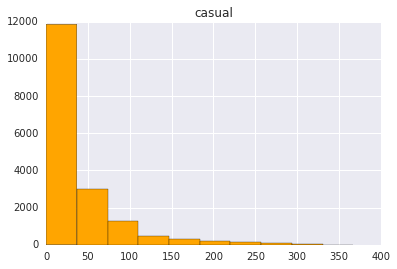

In [84]:
plt.hist(bike_rentals["casual"], color="orange")
plt.title("casual")
plt.show()


In [80]:
rfr=RandomForestRegressor(min_samples_leaf=3)
rfr.fit(train[columns],train["casual"])
labels=rfr.predict(test[columns])
error=mean_squared_error(test["casual"],labels)
error

222.48127213863717

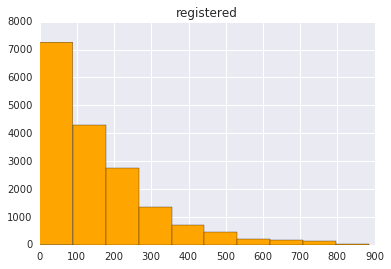

In [83]:
plt.hist(bike_rentals["registered"], color="orange")
plt.title("registered")
plt.show()


In [81]:
rfr=RandomForestRegressor(min_samples_leaf=3)
rfr.fit(train[columns],train["registered"])
labels=rfr.predict(test[columns])
error=mean_squared_error(test["registered"],labels)
error

1276.364264771131